#  K-Nearest Neighbors


Now we've seen how to build a classifier with logistic regression. Aren't there other classifiers we could try?


#### Yes! There are many models. Here are some common ones listed below:
* [DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
* [GaussianNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
* [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [LogisticRegressionCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html)
* [MultinomialNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)
* [NearestCentroid](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html)
* [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* [RidgeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html)
* [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In this lesson, we will get an intuitive and practical feel for the **k-Nearest Neighbors** model. 

- kNN is a **non-parametric model**, meaning it is non-linear. So, the model is not represented as an equation with parameters (e.g. the $\beta$ values in linear regression).
<br>

<a id="k-nearest-neighbors-knn-classification"></a>

## K-Nearest Neighbors (KNN) Classification
---

K-nearest neighbors classification is (as its name implies) a classification model that uses the "K" most similar observations in order to make a prediction.

KNN is a supervised learning method; therefore, the training data must have known target values.

The process of of prediction using KNN is fairly straightforward:

1. Pick a value for K.
2. Search for the K observations in the data that are "nearest" to the measurements of the unknown iris.
    - Euclidian distance is often used as the distance metric, but other metrics are allowed.
3. Use the most popular response value from the K "nearest neighbors" as the predicted response value for the unknown Target Class.

In [1]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#import "Classified Data", set the index_col to 0
df = pd.read_csv("./data/Classified Data",index_col=0)
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


<a id="standardizing-features"></a>
## Standardizing Features
---

There is one major issue that applies to many machine learning models: They are sensitive to feature scale. 

> KNN in particular is sensitive to feature scale because it (by default) uses the Euclidean distance metric. To determine closeness, Euclidean distance sums the square difference along each axis. So, if one axis has large differences and another has small differences, the former axis will contribute much more to the distance than the latter axis.

This means that it matters whether our feature are centered around zero and have similar variance to each other.

In [4]:
#We use a scaler from sklearn

##Import
from sklearn.preprocessing import StandardScaler

##Instantiate
scaler = StandardScaler()

#fit + transform
scaled_features = scaler.fit_transform(df.drop("TARGET CLASS", axis = 1))

In [5]:
#append the new column to the df
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])
df_feat.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.141309e-16,-3.198553e-16,-1.181277e-16,-1.766365e-16,-6.170064e-16,2.531308e-17,2.317035e-16,-4.826139e-16,3.438916e-16,4.525824e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.678050e+00,-2.618747e+00,-2.275858e+00,-2.775551e+00,-2.947206e+00,-2.660802e+00,-2.620466e+00,-2.674465e+00,-2.701361e+00,-3.542140e+00
25%,-7.161683e-01,-6.702761e-01,-7.504105e-01,-7.279635e-01,-6.637361e-01,-7.127975e-01,-7.020467e-01,-7.120098e-01,-7.626629e-01,-6.863610e-01
50%,-3.180217e-02,1.628137e-02,-7.159299e-02,-2.293699e-02,1.433731e-02,-7.940354e-03,-7.093937e-02,-2.236584e-02,2.488297e-02,6.194010e-02
75%,7.378939e-01,7.534412e-01,6.664646e-01,6.631695e-01,6.820374e-01,7.012930e-01,6.723000e-01,7.311915e-01,7.661087e-01,6.961851e-01
max,2.667092e+00,2.799904e+00,3.049325e+00,4.151021e+00,2.538987e+00,2.825739e+00,2.940974e+00,2.470109e+00,2.477734e+00,2.602476e+00


## Train Test Split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df["TARGET CLASS"],
                                                   test_size = .3, random_state = 42)

## Using kNN
Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k = 1.

In [7]:
#Import 
from sklearn.neighbors import KNeighborsClassifier

#Instantiate
knn = KNeighborsClassifier(n_neighbors = 1)

#Fit
knn.fit(X_train, y_train)

#predict
pred = knn.predict(X_test)

In [8]:
#Evaluate
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[134   8]
 [ 11 147]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



## Choosing a K value
How do we make sure we can choose a good K value?

In [10]:
# Will take some time
error_rate = []

for i in range(1, 40): 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

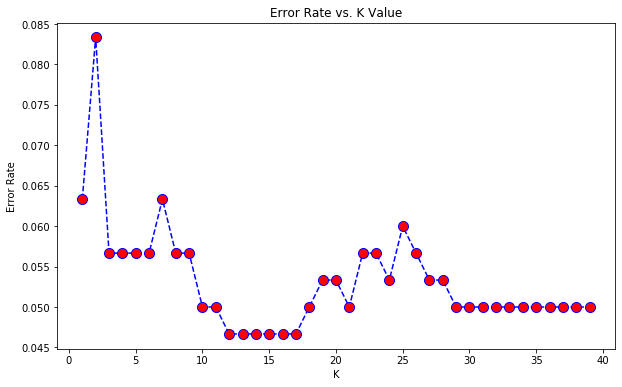

In [11]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [12]:
#... seems like a lot of work... why not...
#from sklearn import grid_search

from sklearn.model_selection import GridSearchCV

k = np.arange(100) + 1
knn = KNeighborsClassifier()

params = {'n_neighbors': k}

#Note! CV should be no more than 25% of the data!
gs = GridSearchCV(    
    estimator= knn,
    param_grid= params,
    cv=5)

gs.fit(X_train, y_train)



#Check the documentation! How do you get only the best k? 

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,

In [13]:
gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=32, p=2,
                     weights='uniform')

In [14]:
gs.best_params_

{'n_neighbors': 32}

In [16]:
#Now with K = ?
knn = KNeighborsClassifier(n_neighbors = 32)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

tn, fp, fn, tp =confusion_matrix(y_test,pred).ravel()

print('WITH K=32')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('Confusion Matrix Expanded')
print('True Negative:{}'.format(tn), 'False Positive:{}'.format(fp))
print('False Negative:{}'.format(fn), 'True Positive:{}'.format(tp))
print('\n')
print(classification_report(y_test,pred))

WITH K=32


[[135   7]
 [  8 150]]


Confusion Matrix Expanded
True Negative:135 False Positive:7
False Negative:8 True Positive:150


              precision    recall  f1-score   support

           0       0.94      0.95      0.95       142
           1       0.96      0.95      0.95       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



### Exercise:

Build a KNN Classifier for yourself using the NBA dataset.

It contains 2015 season statistics for ~500 NBA players. This dataset leads to a nice choice of K, as we'll see below. The columns we'll use for features (and the target 'pos') are:


| Column | Meaning |
| ---    | ---     |
| pos | C: Center. F: Front. G: Guard |
| ast | Assists per game | 
| stl | Steals per game | 
| blk | Blocks per game |
| tov | Turnovers per game | 
| pf  | Personal fouls per game | 

#### Read the nba data into a dataframe


In [20]:
# Read the NBA data into a DataFrame.
import pandas as pd

path = './data/NBA_players_2015.csv'
nba = pd.read_csv(path, index_col=0)

In [21]:
# Map positions to numbers
nba['pos_num'] = nba.pos.map({'C':0, 'F':1, 'G':2})

In [22]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg_,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,pos_num
season_end,,,,,,,,,,,,,,,,,,,,,
2015,Quincy Acy,F,24,NYK,52,21,19.2,2.2,4.6,0.469,...,14.7,0.6,0.5,1.0,0.050,-2.6,-0.7,-3.4,-0.3,1
2015,Jordan Adams,G,20,MEM,18,0,7.3,1.0,2.1,0.474,...,17.7,0.0,0.2,0.2,0.076,-2.3,1.8,-0.5,0.0,2
2015,Steven Adams,C,21,OKC,51,50,24.2,3.0,5.5,0.550,...,14.8,1.0,1.8,2.8,0.109,-2.0,2.0,-0.1,0.6,0
2015,Jeff Adrien,F,28,MIN,17,0,12.6,1.1,2.6,0.432,...,14.1,0.2,0.2,0.4,0.093,-2.6,0.8,-1.8,0.0,1
2015,Arron Afflalo,G,29,TOT,60,54,32.5,5.0,11.8,0.426,...,19.6,1.4,0.7,2.1,0.051,-0.2,-1.4,-1.6,0.2,2


#### Gather some basic info on your dataset

In [24]:
# explore the data through visualizations or summary stats


,age,g,gs,mp,fg,fga,fg_,x3p,x3pa,x3p_,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,pos_num
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,...,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000
mean,26.573222,42.104603,19.874477,20.045607,3.018201,6.847699,0.429230,0.630544,1.855649,0.251502,...,18.915272,1.055858,0.971339,2.027197,0.073575,-1.396862,-0.495816,-1.892678,0.485983,1.253138
std,4.219585,18.950602,22.170034,9.313441,2.052790,4.386828,0.111007,0.665808,1.790564,0.162896,...,5.493491,1.589667,0.876932,2.243138,0.133530,4.251216,2.299572,5.116001,1.013097,0.721590
min,19.000000,1.000000,0.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-2.100000,-0.100000,-0.800000,-1.059000,-36.800000,-13.500000,-50.300000,-1.000000,0.000000
25%,23.000000,27.000000,0.000000,12.600000,1.425000,3.400000,0.391000,0.000000,0.100000,0.119750,...,14.800000,0.000000,0.200000,0.300000,0.040250,-2.800000,-1.600000,-3.300000,-0.100000,1.000000
50%,26.000000,47.000000,10.500000,19.850000,2.700000,5.900000,0.432000,0.450000,1.400000,0.311500,...,18.400000,0.600000,0.800000,1.400000,0.082500,-1.000000,-0.500000,-1.300000,0.100000,1.000000
75%,29.000000,59.000000,39.000000,28.175000,4.275000,9.600000,0.481750,1.000000,3.075000,0.365000,...,21.900000,1.600000,1.500000,3.000000,0.123000,0.500000,0.875000,0.500000,0.700000,2.000000
max,38.000000,66.000000,66.000000,38.900000,9.500000,21.400000,1.000000,3.400000,8.000000,1.000000,...,45.900000,9.500000,4.300000,13.000000,1.489000,28.300000,6.500000,15.100000,6.200000,2.000000


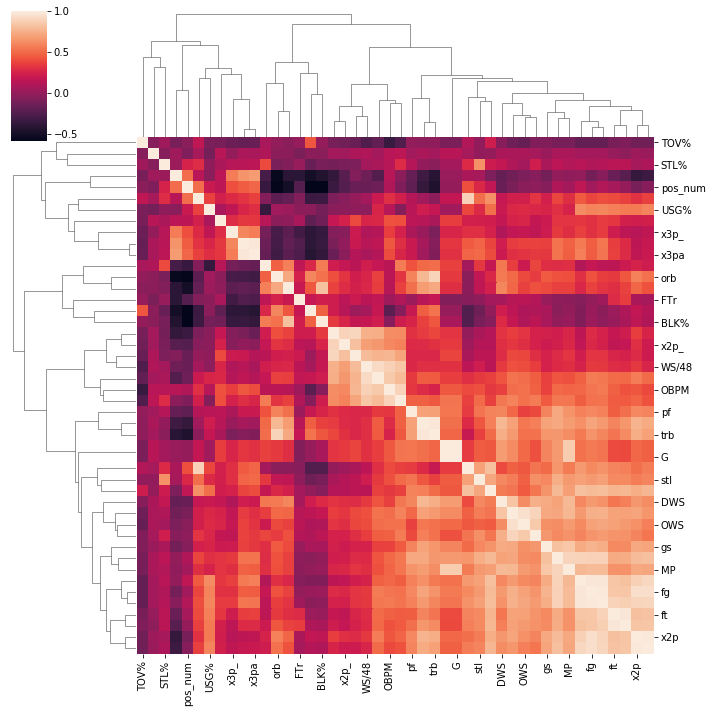

In [26]:
# look at your target variable counts. What do you notice? 


2    200
1    199
0     79
Name: pos_num, dtype: int64

G    200
F    199
C     79
Name: pos, dtype: int64

In [28]:
# Limit to the variables we care about to make this easier


,ast,stl,blk,tov,pf,pos_num
season_end,,,,,,
2015,1.0,0.4,0.3,0.9,2.2,1
2015,0.4,0.4,0.3,0.4,0.8,2
2015,1.0,0.4,1.2,1.6,3.0,0
2015,0.9,0.2,0.5,0.5,1.8,1
2015,1.9,0.6,0.1,1.6,2.1,2


#### Define your target variables, features

In [29]:
# Create feature matrix (X).

# Create response vector (y).


#### Scale your features

In [30]:
##Import


##Instantiate

#fit + transform


#### Split your data and build a kNN model

In [34]:
# split your data
from sklearn.model_selection import train_test_split



In [35]:
# build your model
#Import 
from sklearn.neighbors import KNeighborsClassifier


#Instantiate

#Fit


#predict


#### Evalutate your model

In [36]:
#Evaluate
from sklearn.metrics import classification_report, confusion_matrix



array([[ 9,  8,  1],
       [11, 33, 17],
       [ 3, 15, 47]])

              precision    recall  f1-score   support

           0       0.39      0.50      0.44        18
           1       0.59      0.54      0.56        61
           2       0.72      0.72      0.72        65

    accuracy                           0.62       144
   macro avg       0.57      0.59      0.58       144
weighted avg       0.62      0.62      0.62       144



In [45]:
nba.pos_num.value_counts()/nba.shape[0]
# majority class makes up ~42% of our dataset
# if we were to guess that every new observation were just the majority class, 
# we would expect to be correct 42% of the time



2    0.418410
1    0.416318
0    0.165272
Name: pos_num, dtype: float64

#### Bonus: Search the hyperparameter space for the best kNN model

In [46]:
from sklearn.model_selection import GridSearchCV



#Note! CV should be no more than 25% of the data!


#Check the documentation! How do you get only the best k? 


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [47]:
#How do you get only the best k? 


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

{'n_neighbors': 15}

In [49]:
#Now with K = ?


[[ 7 10  1]
 [ 5 43 13]
 [ 1 13 51]]


WITH K=15


              precision    recall  f1-score   support

           0       0.54      0.39      0.45        18
           1       0.65      0.70      0.68        61
           2       0.78      0.78      0.78        65

    accuracy                           0.70       144
   macro avg       0.66      0.63      0.64       144
weighted avg       0.70      0.70      0.70       144

